In [1]:
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import uniform,norm,t,binom,expon,chi2,gamma,poisson,beta,dirichlet
from scipy.stats import multivariate_normal as multi_norm
from sklearn.linear_model import LinearRegression as Linear
from scipy.optimize import brentq
from scipy.special import perm,comb
import time
import pandas as pd

**11.1**

In [2]:
def Mmw(P,disp):
    X0=np.array([[0,1,0,0,0]])
    n=1000
    PB=np.zeros(n+1)
    X=X0.copy()
    PB[0]=X[0,3]
    for i in range(n):
        X=X.dot(P)
        PB[i+1]=X[0,3]

    plt.plot(np.arange(n+1),PB)
    plt.show()
    print('converge to',PB[-disp:])

    plt.plot(np.arange(11),PB[:11])
    plt.show()

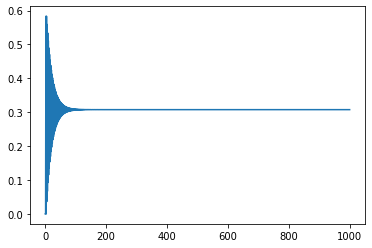

converge to [0.30769231]


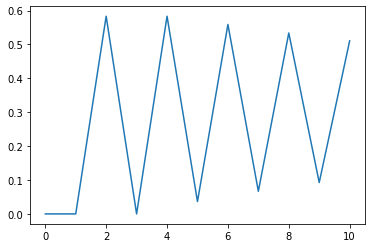

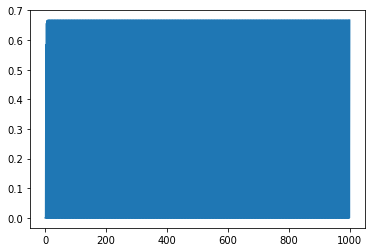

converge to [0.         0.66666667 0.         0.66666667]


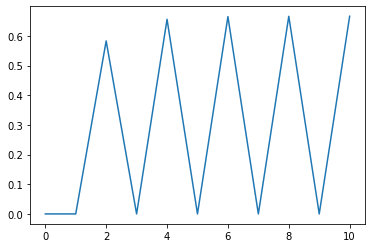

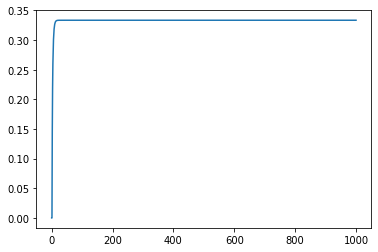

converge to [0.33333333]


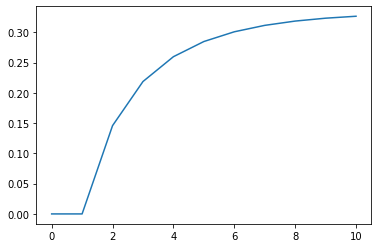

In [3]:
P1=np.array([[0,0.5,0,0.5,0],[0.5,0,0.5,0,0],[0,1/3,0,2/3,0],[0.25,0,0.5,0,0.25],[0,0,0,0.5,0.5]])
P2=np.array([[0,0.5,0,0.5,0],[0.5,0,0.5,0,0],[0,1/3,0,2/3,0],[0.25,0,0.5,0,0.25],[0,0,0,1,0]])
P3=(P2+np.diag(np.ones(5)))/2
Mmw(P1,1)
Mmw(P2,4)
Mmw(P3,1)

In [4]:
w,v=np.linalg.eig(P1.T)
print(w)
print(v)
p1=v[:,1]/v[:,1].sum()
print(p1)
print(p1[3])

[-0.94629011  1.         -0.20308961  0.09836858  0.55101113]
[[ 0.37310084 -0.32879797 -0.43147108 -0.48345497 -0.30906116]
 [-0.38780998 -0.32879797  0.49170714 -0.31463054 -0.42246929]
 [ 0.54129097 -0.49319696  0.3476248   0.63233317 -0.23476411]
 [-0.63662659 -0.65759595 -0.63290511  0.43903397  0.16375402]
 [ 0.11004476 -0.32879797  0.22504425 -0.27328164  0.80254055]]
[0.15384615 0.15384615 0.23076923 0.30769231 0.15384615]
0.3076923076923078


In [5]:
w,v=np.linalg.eig(P2.T)
print(w)
print(v)
p1=v[:,1]/v[:,1].sum()
print(p1)
print(p1[3])

[-1.00000000e+00  1.00000000e+00 -3.53553391e-01 -1.98025655e-17
  3.53553391e-01]
[[-3.42997170e-01  3.42997170e-01  4.08248290e-01  5.34522484e-01
  -4.08248290e-01]
 [ 3.42997170e-01  3.42997170e-01 -5.77350269e-01  3.00452053e-17
  -5.77350269e-01]
 [-5.14495755e-01  5.14495755e-01  1.47472983e-16 -8.01783726e-01
  -5.28339194e-16]
 [ 6.85994341e-01  6.85994341e-01  5.77350269e-01 -1.12669520e-16
   5.77350269e-01]
 [-1.71498585e-01  1.71498585e-01 -4.08248290e-01  2.67261242e-01
   4.08248290e-01]]
[0.16666667 0.16666667 0.25       0.33333333 0.08333333]
0.33333333333333337


In [6]:
w,v=np.linalg.eig(P3.T)
print(w)
print(v)
p1=v[:,1]/v[:,1].sum()
print(p1)
print(p1[3])

[-1.11022302e-16  1.00000000e+00  3.23223305e-01  5.00000000e-01
  6.76776695e-01]
[[ 3.42997170e-01 -3.42997170e-01 -4.08248290e-01 -5.34522484e-01
  -4.08248290e-01]
 [-3.42997170e-01 -3.42997170e-01  5.77350269e-01  2.89162225e-16
  -5.77350269e-01]
 [ 5.14495755e-01 -5.14495755e-01 -8.92536289e-16  8.01783726e-01
  -1.02165304e-15]
 [-6.85994341e-01 -6.85994341e-01 -5.77350269e-01  2.10299800e-16
   5.77350269e-01]
 [ 1.71498585e-01 -1.71498585e-01  4.08248290e-01 -2.67261242e-01
   4.08248290e-01]]
[0.16666667 0.16666667 0.25       0.33333333 0.08333333]
0.33333333333333354


**11.3**

In [8]:
print(np.array([2,2,3,4,2])/13)

[0.15384615 0.15384615 0.23076923 0.30769231 0.15384615]
